# 1. pLSA、共轭先验分布；LDA主题模型原理

### 主题模型简介

    每篇文档用bag-of-words模型表示，也就是每篇文档只与所包含的词有关，而不考虑这些词的先后顺序。假设文档集D有N篇文档，主题模型认为在这N篇文档中一共隐含了Z个主题，每篇文档都可能属于一个或多个主题，这可以用给定文档dd时所属主题zz的概率分布p(z|d)表示。同理，一个主题下可以包含若干个词w，用概率分布p(w|z)表示。
    
    所以，如果我们有文档集D，又求出对应这个文档集的主题模型，那这有什么意义呢？最明显的意义就是，这相当于给文档聚类了，并且聚类的结果有更合理的解释性。因为我们不但可以知道每一篇文档dd属于哪个类别z，我们还可以根据概率p(w|z)知道这个主题的关键词是哪些，从而给这个主题zz设置合理的标签。知道文档所属的类别，我们就可以判断两篇文档在语义上是否相似了。虽然可以直接根据文档向量的余弦距离来判断它们是否相似，但是这对近义词就无能为力，比如两篇同样介绍电子产品的文档，一篇大量用“苹果”这个关键词，而另一篇大量用“iPhone”，那么通过余弦距离判断的这两个维度上肯定是不相似的。而“苹果”、“iPhone”两个词都与电子产品关系很大，所以这两篇文档可以都属于同一个主题，也就可以断定他们语义上是相似的。
    
    主题模型的用处还是很多的，在推荐系统，舆情监控等等，都有广泛的用途。
### pLSA
    pLSA(Probabilistic Latent Senmantic Indexing)是Hoffman在1999年提出的基于概率的隐语义分析。之所以说是probabilistic，是因为这个模型中还加入了一个隐变量：主题Z ，也正因为此，它被称之为主题模型。

### 共轭先验分布
    设θ是总体分布中的参数(或参数向量)，π(θ)是θ的先验密度函数，假如由抽样信息算得的后验密度函数与π(θ)有相同的函数形式，则称π(θ)是θ的(自然)共轭先验分布。

    这里通过举一个例子来展示何为共轭先验分布。 
    设一事件A的概率p(A)=θ。为了估计θ的值，作了n次独立观察，其中事件A出现的次数为X，显然X服从二项分布X∼B(n,θ)。 因此 ：
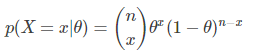
    利用贝叶斯公式，我们首先需要确定先验概率p(θ)。在未得到其余信息前，我们只能认为θ在(0,1)上均匀分布，这是一种不失偏颇的先验估计。 
    到这里我们就已经可以计算出p(x,θ)这一联合概率分布。 
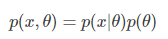
    然后通过联合概率分布，我们又可以得出p(x)的边缘概率分布。                                            
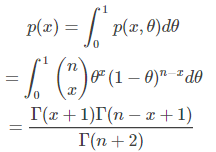
    综合以上可得θθ的后验分布：
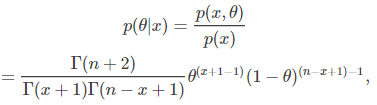
    细心点就会发现这个分布就是参数为(x+1)和(n−x+1)(x+1)和(n−x+1)的贝塔分布，即p(θ|x) Be(x+1,n−x+1)p(θ|x) Be(x+1,n−x+1)。更奇妙的是先验分布p(θ)p(θ)，区间(0,1)上的均匀分布也是一种特殊的贝塔分布Be(1,1)。


### LDA
#### LDA介绍
       LDA（Latent Dirichlet Allocation）是一种文档主题生成模型，也称为一个三层贝叶斯概率模型，包含词、主题和文档三层结构。所谓生成模型，就是说，我们认为一篇文章的每个词都是通过“以一定概率选择了某个主题，并从这个主题中以一定概率选择某个词语”这样一个过程得到。文档到主题服从多项式分布，主题到词服从多项式分布。

       LDA是一种非监督机器学习技术，可以用来识别大规模文档集（document collection）或语料库（corpus）中潜藏的主题信息。它采用了词袋（bag of words）的方法，这种方法将每一篇文档视为一个词频向量，从而将文本信息转化为了易于建模的数字信息。但是词袋方法没有考虑词与词之间的顺序，这简化了问题的复杂性，同时也为模型的改进提供了契机。每一篇文档代表了一些主题所构成的一个概率分布，而每一个主题又代表了很多单词所构成的一个概率分布。

#### LDA生成过程
       对于语料库中的每篇文档，LDA定义了如下生成过程（generativeprocess）：  

1. 对每一篇文档，从主题分布中抽取一个主题;
2. 从上述被抽到的主题所对应的单词分布中抽取一个单词;
3. 重复上述过程直至遍历文档中的每一个单词。  
       语料库中的每一篇文档与T（通过反复试验等方法事先给定）个主题的一个多项分布 （multinomialdistribution）相对应，将该多项分布记为θ。每个主题又与词汇表（vocabulary）中的V个单词的一个多项分布相对应，将这个多项分布记为φ。

#### LDA整体流程
文档集合D，主题集合T。
D中每个文档d看作一个单词序列<w1, w2, …… ,wn>，wi表示第i个单词，设d有n个单词。（LDA里面称之为wordbag，实际上每个单词的出现位置对LDA算法无影响）

文档集合D中的所有单词组成一个大集合VOCABULARY(简称VOC)。

LDA以文档集合D作为输入，希望训练出两个结果向量(设聚成k个topic，VOC中共包含m个词)。

对每个D中的文档d，对应到不同Topic的概率θd<pt1,...,ptk>，其中，pti表示d对应T中第i个topic的概率。计算方法是直观的，pti=nti/n，其中nti表示d中对应第i个topic的词的数目，n是d中所有词的总数。

对每个T中的topic，生成不同单词的概率φt<pw1,...,pwm>，其中，pwi表示t生成VOC中第i个单词的概率。计算方法同样很直观，pwi=Nwi/N，其中Nwi表示对应到topict的VOC中第i个单词的数目，N表示所有对应到topict的单词总数。

LDA的核心公式如下：  

p(w|d)=p(w|t)*p(t|d)  

直观的看这个公式，就是以Topic作为中间层，可以通过当前的θd和φt给出了文档d中出现单词w的概率。其中p(t|d)利用θd计算得到，p(w|t)利用φt计算得到。 

实际上，利用当前的θd和φt，我们可以为一个文档中的一个单词计算它对应任意一个Topic时的p(w|d)，然后根据这些结果来更新这个词应该对应的topic。然后，如果这个更新改变了这个单词所对应的Topic，就会反过来影响θd和φt。

关于PLSA的原理及公式推导可以参考博客： http://www.cnblogs.com/bentuwuying/p/6219970.html

参考资料：
https://segmentfault.com/a/1190000012215533#articleHeader1

https://blog.csdn.net/yyy430/article/details/88346920

# 2. LDA应用场景 

1. 相似文档发现
2. 新闻个性化推荐
3. 自动打标签
4. wordRank

# 3. LDA优缺点 

LDA算法既可以用来降维，又可以用来分类，但是目前来说，主要还是用于降维。

LDA算法的主要优点有：

1）在降维过程中可以使用类别的先验知识经验，而像PCA这样的无监督学习则无法使用类别先验知识。

2）LDA在样本分类信息依赖均值而不是方差的时候，比PCA之类的算法较优。

LDA算法的主要缺点有：

1）LDA不适合对非高斯分布样本进行降维，PCA也有这个问题。

2）LDA降维最多降到类别数k-1的维数，如果我们降维的维度大于k-1，则不能使用LDA。当然目前有一些LDA的进化版算法可以绕过这个问题。

3）LDA在样本分类信息依赖方差而不是均值的时候，降维效果不好。

4）LDA可能过度拟合数据。


# 4. LDA 参数学习 

n_components : int, optional (default=10):主题数

doc_topic_prior : float, optional (default=None):文档主题先验Dirichlet分布θd的参数α

topic_word_prior : float, optional (default=None):主题词先验Dirichlet分布βk的参数η

learning_method : 'batch' | 'online', default='online':LDA的求解算法。有 ‘batch’ 和 ‘online’两种选择

learning_decay : float, optional (default=0.7):控制"online"算法的学习率，默认是0.7

learning_offset : float, optional (default=10.):仅在算法使用"online"时有意义，取值要大于1。用来减小前面训练样本批次对最终模型的影响
    
max_iter : integer, optional (default=10):EM算法的最大迭代次数

batch_size : int, optional (default=128):仅在算法使用"online"时有意义， 即每次EM算法迭代时使用的文档样本的数量。

evaluate_every : int, optional (default=0):多久评估一次perplexity。仅用于`fit`方法。将其设置为0或负数以不评估perplexity训练。
     
total_samples : int, optional (default=1e6):仅在算法使用"online"时有意义， 即分步训练时每一批文档样本的数量。在使用partial_fit函数时需要。

perp_tol : float, optional (default=1e-1):batch的perplexity容忍度。

mean_change_tol : float, optional (default=1e-3):即E步更新变分参数的阈值，所有变分参数更新小于阈值则E步结束，转入M步。

max_doc_update_iter : int (default=100):即E步更新变分参数的最大迭代次数，如果E步迭代次数达到阈值，则转入M步。

n_jobs : int, optional (default=1):在E步中使用的资源数量。 如果为-1，则使用所有CPU。


# 5. 使用LDA生成主题特征，在之前特征的基础上加入主题特征进行文本分类

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import jieba


def get_stop_words():
    with open("../data/stopwords/中文停用词表.txt", encoding="utf-8") as file:
        stopwords_lines = file.readlines()
    stopwords = [line.strip() for line in stopwords_lines]
    return stopwords


def get_data():
    with open("../data/cnews/cnews.train.txt", encoding='utf-8') as data:
        lines = data.readlines()
    train_data = {" ".join(jieba.cut(line[2:].strip())): line[0:2] for line in lines}  # 将训练集分词，并与其label数据存入字典
    train_x = train_data.keys()
    train_y = train_data.values()
    return train_x, train_y


def main():
    x, y = get_data()
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.5)
    stopwords = get_stop_words()

    train_tf = TfidfVectorizer(stop_words=stopwords, max_df=0.5)
    train_x = train_tf.fit_transform(train_x)

    clf = LatentDirichletAllocation(n_topics=14, 
                                max_iter=50,
                                learning_method='batch')
    clf.fit(train_x, train_y)

    test_tf = TfidfVectorizer(stop_words=stopwords, max_df=0.5, vocabulary=train_tf.vocabulary_)
    test_x = test_tf.fit_transform(test_x)

    predicted_y = clf.predict(test_x)
    score = accuracy_score(test_y, predicted_y)
    print(score)


if __name__ == '__main__':
    main()